Two parts of a neuron: summation and activation.

Dense means every neuron in a layer is connected to every other neurons in next layer

In [49]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [50]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [51]:
len(X_train), len(X_test)

(60000, 10000)

In [52]:
X_train[0].shape, X_test[0].shape

((28, 28), (28, 28))

Scaling improves the accuracy

In [53]:
X_train = X_train/255
X_test = X_test/255

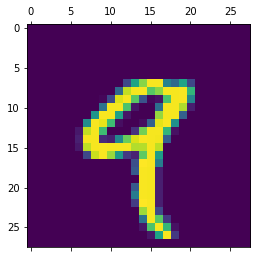

In [54]:
plt.matshow(X_train[4])

In [55]:
y_train[4]

9

In [56]:
#flatten the matrix

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [57]:
X_train_flattened.shape

(60000, 784)

In [58]:
model_wo_hl = keras.Sequential([
                  keras.layers.Dense(10, 
                                     input_shape = (784,), 
                                     activation='sigmoid')
])

model_wo_hl.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_wo_hl.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4646 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2659 - accuracy: 0.9260


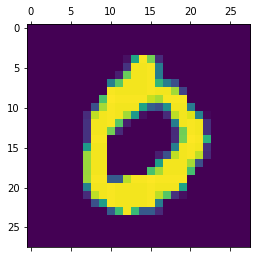

In [59]:
plt.matshow(X_test[3])

In [60]:
import seaborn as sns 

def confusion_matrix(m):
  print("Accuracy", m.evaluate(X_test_flattened, y_test))
  y_preds = m.predict(X_test_flattened)
  y_predicted = [np.argmax(i) for i in y_preds]
  cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
  plt.figure(figsize= (10,7))
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

313/313 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.9280
Accuracy [0.26438799500465393, 0.9279999732971191]


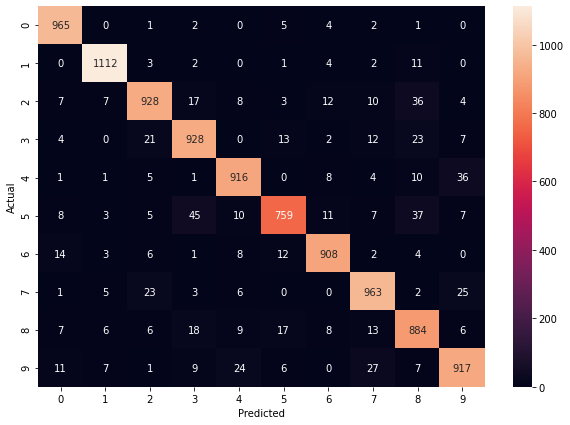

In [61]:
confusion_matrix(model_wo_hl)

Adding hidden layers to improve the model

In [62]:
model_w_hl = keras.Sequential([
        keras.layers.Dense(100,input_shape = (784,), activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
])

model_w_hl.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_w_hl.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9844


313/313 [==============================] - 1s 1ms/step - loss: 0.0766 - accuracy: 0.9761
Accuracy [0.07658812403678894, 0.9761000275611877]


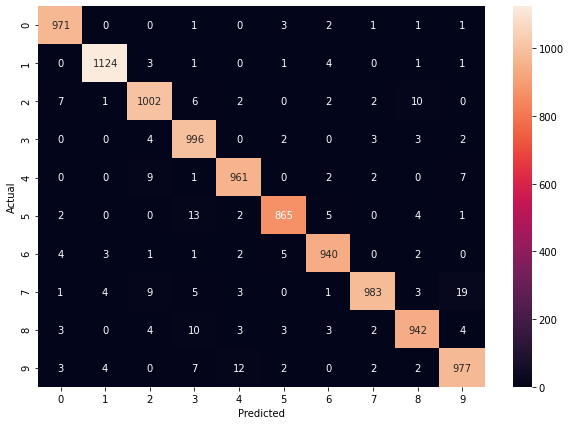

In [63]:
confusion_matrix(model_w_hl)